In [1]:
# %matplotlib widget
import numpy as np 
import matplotlib.pyplot as plt
import rebound  


from PIL import Image
# %matplotlib ipympl

# Roba

Valore di G: 1.000000
Valore di G: 0.000000


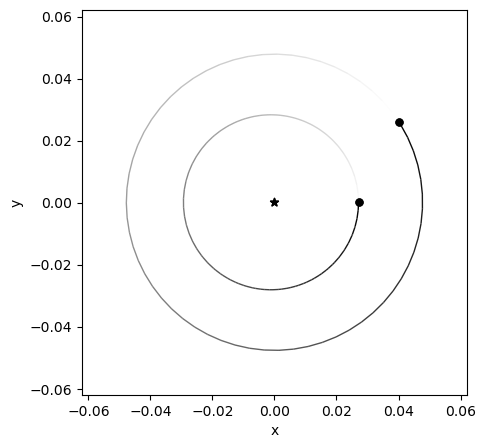

In [2]:
sim = rebound.Simulation()
sim.start_server(port=1234)
# sim.status(showAllFields=False)

# di default si ha
# sim.units = ['msun','yr/2pie','AU']
print("Valore di G: %f" % sim.G)

# Posso modificarle così
sim.units = ['mearth','day','AU']
print("Valore di G: %f" % sim.G)

sim.add(m=40000)
sim.add(m=.25,P=5,e=.04)
sim.add(m=1.6,P=11)

# sim.status(showAllFields=False)

sim.integrate(100)
# sim.status(showAllFields=False)

# per plottare la traittoria dovrei fare un ciclo for i,t in enumarate(times) iterando sim.integrate(t) e prendendo le posizioni e velocità da sim.particles[0].x ...

# oppure
op = rebound.OrbitPlot(sim)

# The comet 67P/Churyumov–Gerasimenko

In [3]:
# per visualizzare nel server  http://localhost:1234
sim = rebound.Simulation()
sim.start_server(port=5678)
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("NAME = Churyumov-Gerasimenko; CAP", m =5.03e-18)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME = Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 


In [4]:
sim.status(showAllFields=False)
for orbit in sim.orbits():
    print(orbit)

---------------------------------
REBOUND version:     	4.4.2
REBOUND built on:    	Jul 15 2024 18:47:33
Number of particles: 	4
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x1cc812c9cd0, m=0.9999999999950272 x=-0.005233682976464677 y=-0.005132741165409791 z=0.00017115526037888795 vx=0.00042327906192473496 vy=-0.0001637926848572354 vz=-7.205562316703812e-06>
<rebound.particle.Particle object at 0x1cc812c9c50, m=0.0009547919099366768 x=0.5331836436120928 y=5.071871725883298 z=-0.03296459879754463 vx=-0.441306694206554 vy=0.06676309646210188 vz=0.00959768236428745>
<rebound.particle.Particle object at 0x1cc812c9cd0, m=0.0002858856700231729 x=9.49707329540562 y=-1.3927880430143524 z=-0.35391026370056033 vx=0.02905950593935618 vy=0.32020231032508123 vz=-0.006725204981451244>
<rebound.particle.Particle object at 0x1cc812c9c50, m=5.03e-18 x=-2.803316379635227 y=-

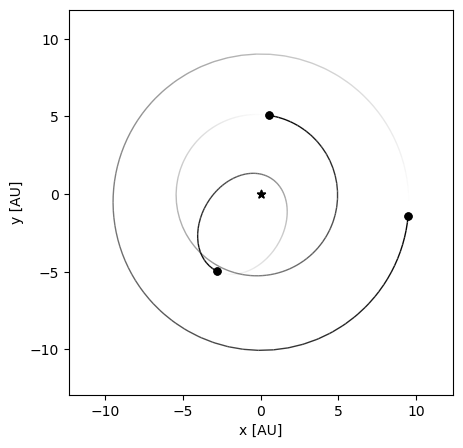

In [5]:
fig = rebound.OrbitPlot(sim, unitlabel="[AU]")

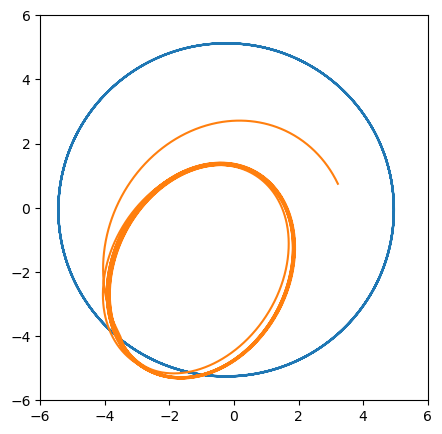

In [6]:
sim.dt = -0.01

Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,-70.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[3].x
    y[1][i] = ps[3].y
    z[1][i] = ps[3].z


fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);

Minimum distance (0.048911 AU) occured at time: -66.093609 years.


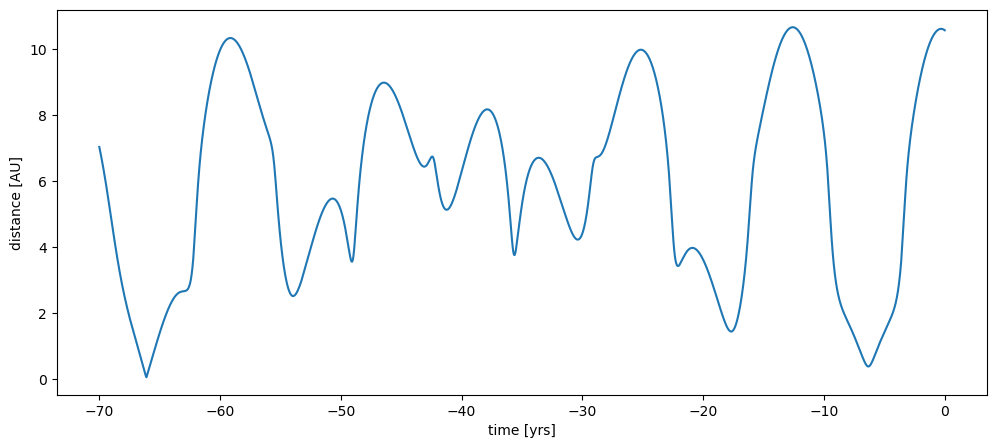

In [7]:
# Calcolo la loro distanza nel tmepo

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("distance [AU]")
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance),closeencountertime))

In [8]:
import datetime
encounterdate = datetime.datetime.today() + datetime.timedelta(days=365.25*closeencountertime)
encounterdate.strftime("%Y-%m-%d %H:%M")

'1959-02-04 23:06'

If you check Wikipedia or JPL, the encounter happened on 1959-Feb-04 06:24, so we are not far off (it turns out that's because of jets and other non-gravitational forces from the comet!)

https://en.wikipedia.org/wiki/67P/Churyumov%E2%80%93Gerasimenko

https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=67P;old%3D0;orb%3D0;cov%3D0;log%3D0;cad%3D1




# Asteroidi

In [9]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")
# sim.add("Apophis", m = 6.1e+10)
sim.add("Earth")
sim.add("2004 FH")

# sim.status(showAllFields=False)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for '2004 FH'... 
Found: (2004 FH) 


c:\Users\Fisica\miniconda3\Lib\site-packages\rebound\horizons.py:172: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [10]:
# sim.add("NAME=Halley")

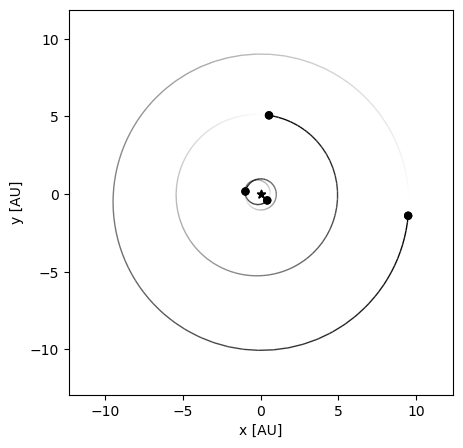

In [11]:
op = rebound.OrbitPlot(sim, unitlabel="[AU]")
op.particles.set_color(['black','black','black','black','red'])

# op1 = rebound.OrbitPlot(sim, particles=[1,2,3])
# op2 = rebound.OrbitPlot(sim, particles=[4], ax=op1.ax, fig=op1.fig, lw=1, color="red")

Non sono sicuro che l'asteroide sia plottato correttamente, in base alla questione dei semassi in ordine crescente

# Roba 2

In [12]:
def heartbeat(sim_pointer):
    sim = sim_pointer.contents
    print(sim.t)
    
sim = rebound.Simulation()
sim.heartbeat = heartbeat
print(sim.softening)
print(sim.opening_angle2)

# Per vederlo nel browser http://localhost:1234 
# Non devo scriverlo se voglio usare il widget
sim.start_server(port=1234) 

# Se voglio che il box sia visibile devo specificare la tipologia di boundary
size = 100.
sim.configure_box(size) # se voglio un cubo posso indicare solo la size

sim.boundary = "open" 
# sim.gravity = 'tree'

# sim.add("Sun")x
# sim.add("Earth")
# rebound.data.add_solar_system(sim)
rebound.data.add_outer_solar_system(sim)


0.0
0.25


In [13]:
sim.widget(size=(600,600))

In [14]:
# sim.walltime
# sim.status(showAllFields=False)


# Self-gravitating disc

In [4]:
# def heartbeat(sim_pointer):
#     sim = sim_pointer.contents
#     print(sim.t)

sim = rebound.Simulation()
sim.start_server(port=4444) 
# sim.heartbeat = heartbeat
sim.widget(size=(600,600))

sim.integrator = "leapfrog"
# sim.gravity = "tree"
sim.boundary = "open"

sim.opening_angle2 = 1.5 #  This constant determines the accuracy of the tree code gravity estimate.
sim.softening = 0.2 # Gravitational softening length
sim.dt = 1e-2
sim.G = 1

# Setup root boxes for gravity tree.

size = 20
sim.configure_box(size)
# Setup particles
disc_mass = 2e-1
N = 1000
# Initial conditions
sim.add(m=1.)

# sim.status(showAllFields=False)

rMax = 0.7*size/2
rMin = 0.2*size/2
slope = 1
np.random.seed(0)
for i in range(N):
    
# a = rebound.reb_random_powerlaw(min=size/10.,max=size/2./1.2,slope=-1.5)
# a = sim.reb_random_powerlaw(min=size/10.,max=size/2./1.2,slope=-1.5)
    # a = np.random.rand(1)*(rMax-rMin) + rMin # sampling uniforme
    # a = (rMax-rMin)*(np.random.rand(1)+rMin/(rMax-rMin)) # sampling lineare
    # a = rMax*np.sqrt(-rMin**2/(rMin**2-rMax**2))*(np.random.rand(1)-(rMin**2)/(rMin**2-rMax**2))**(-1/2) # sampling con slope -1/2
    q = -3/2
    
    a = rMax*((rMin/rMax)**(1/q)-1)**q*(np.random.rand(1)+((rMin/rMax)**(1/q)-1)**-1)**q # q diverso da 0 e 1
    phi = np.random.rand(1)*2*np.pi
    # mu = sim.particles[0].m + disc_mass*(a**(-3/2)-rMin**(-3/2))/(rMax**(-3/2)-rMin**(-3/2))
    mu = sim.particles[0].m + disc_mass*(a**-3/2-rMin**-3/2)/(rMax**-3/2-rMin**-3/2)

    v_kep = np.sqrt(sim.G*mu/a)
    sim.add(m=disc_mass/N,x=a*np.cos(phi),y=a*np.sin(phi),z=a*np.random.rand(1)*0.001,vx=v_kep*np.sin(phi),vy=-v_kep*np.cos(phi),vz=0)

# plt.hist([p.a for p in sim.particles[1:]], bins = 100)
# plt.show()

In [5]:
sim.integrate(10.)

# Dynamical friction

In [10]:
sim = rebound.Simulation()
sim.start_server(port=1234) 
sim.widget(size=(600,600))

sim.integrator = "leapfrog"
# sim.gravity = "tree"
sim.boundary = "periodic"

# sim.N_ghost_x = 2
# sim.N_ghost_y = 2
# sim.N_ghost_z = 2

sim.opening_angle2 = 1.5 
sim.softening = 0.2 
sim.dt = 1e-3
sim.G = 1

size = 20
sim.configure_box(size)
# Setup particles
disc_mass = 2e-1
N = 1000
Mtot = 1000
m = Mtot/N
# Initial conditions
# sim.add(m=1.)

rMax = 0.1*size/2
rMin = -0.1*size/2

vel = 10
vMax = 1*vel
vMin = 0*vel

slope = 1
np.random.seed(2)

M = 1000
Vx = 50

for i in range(N):
    x = (rMax-rMin)*(np.random.rand(1)+rMin/(rMax-rMin))
    y = (rMax-rMin)*(np.random.rand(1)+rMin/(rMax-rMin))
    z = (rMax-rMin)*(np.random.rand(1)+rMin/(rMax-rMin))

    vx = (vMax-vMin)*(np.random.rand(1)+vMin/(vMax-vMin))
    vy = (vMax-vMin)*(np.random.rand(1)+vMin/(vMax-vMin))
    vz = (vMax-vMin)*(np.random.rand(1)+vMin/(vMax-vMin))

    sim.add(m=m,x = x,y=y,z=z ,vx = vx, vy=vy, vz=vz)

t_cross = size/Vx
t_relax = 0.1*N/np.log(N) * t_cross
print(t_relax)

5.790593092043358


In [11]:
sim.move_to_com()
sim.integrate(5)

In [12]:
sim.add(m=M,vx=Vx, hash='BH')

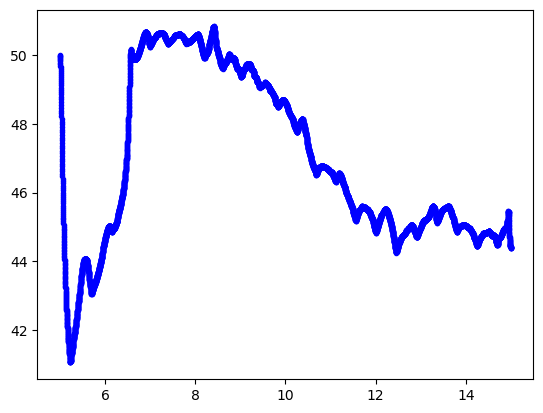

In [13]:
v = 0

fig,ax = plt.subplots()
# plt.show()

def heartbeat(sim_pointer):
    global v

    # The function argument is a pointer to the simulation:
    # Here we get its contents:
    sim = sim_pointer.contents 
    v = np.sqrt(sim.particles['BH'].vx**2+sim.particles['BH'].vy**2+sim.particles['BH'].vz**2)
    ax.plot(sim.t,v,'b.')


sim.heartbeat = heartbeat
sim.integrate(15)

In [125]:
t_cross

0.4

In [57]:
sim.status(showAllFields=False)

---------------------------------
REBOUND version:     	4.4.2
REBOUND built on:    	Jul 15 2024 18:47:33
Number of particles: 	1001
Selected integrator: 	leapfrog
Simulation time:     	1.0000000000000000e+01
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x28ffb937350, m=1000.0 x=9.514574230727277 y=-0.06414958313987952 z=-0.11160832549451268 vx=97.58610752768107 vy=1.211921750661659 vz=0.4205320967703541>
<rebound.particle.Particle object at 0x28ffb95a8d0, m=1.0 x=5.325333422929132 y=4.722637681159187 z=-4.047405849935677 vx=70.79092679183994 vy=44.188359037805284 vz=73.24925749245843>
<rebound.particle.Particle object at 0x28ffb937350, m=1.0 x=-9.91547174097781 y=2.4163292601417603 z=8.982119688209416 vx=48.358358245963586 vy=85.00838669536677 vz=36.2204441661248>
<rebound.particle.Particle object at 0x28ffb95a8d0, m=1.0 x=-3.916316585028289 y=-5.168656731067515 z=2.216124534604065 vx=-6.463040244864048 vy=19.33713416714704 vz=87

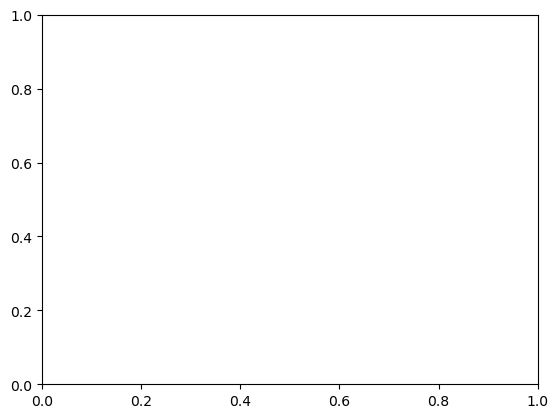

Exception ignored on calling ctypes callback function: <function heartbeat at 0x0000028FF8B8A840>
Traceback (most recent call last):
  File "C:\Users\Fisica\AppData\Local\Temp\ipykernel_4780\2993846011.py", line 24, in heartbeat
AttributeError: 'Particles' object has no attribute 'a'
Exception ignored on calling ctypes callback function: <function heartbeat at 0x0000028FF8B8A840>
Traceback (most recent call last):
  File "C:\Users\Fisica\AppData\Local\Temp\ipykernel_4780\2993846011.py", line 24, in heartbeat
AttributeError: 'Particles' object has no attribute 'a'
Exception ignored on calling ctypes callback function: <function heartbeat at 0x0000028FF8B8A840>
Traceback (most recent call last):
  File "C:\Users\Fisica\AppData\Local\Temp\ipykernel_4780\2993846011.py", line 24, in heartbeat
AttributeError: 'Particles' object has no attribute 'a'
Exception ignored on calling ctypes callback function: <function heartbeat at 0x0000028FF8B8A840>
Traceback (most recent call last):
  File "C:\U

In [ ]:
# Plotto le condizioni iniziali
# sim.heartbeat = heartbeat


# We use a global variable to store the value of the eccentricity
nSteps = 100
e1,e2,e3 = 0,0,0
a = np.zeros(N)
fig,ax = plt.subplots()
plt.show()
def heartbeat(sim_pointer):
    global e1, e2, e3, a 

    # The function argument is a pointer to the simulation:
    # Here we get its contents:
    sim = sim_pointer.contents 
    # e1 = sim.particles[-1].e
    # e2 = sim.particles[-2].e
    # e3 = sim.particles[-3].e

    # ax.plot(sim.t,e1,'b.')
    # ax.plot(sim.t,e2,'g.')
    # ax.plot(sim.t,e3,'r.')
    a = sim.particles.a
    # ax.plot(sim.t,a,'r.')
    

# sim.heartbeat = heartbeat
# for i in range(10):

#     sim.steps(nSteps)
#     plt.hist([p.a for p in sim.particles[1:]], bins = 100)
#     fig.canvas.draw()
#     plt.show()

# sim.steps(nSteps)
sim.integrate(10.)
# sim.usleep = 1000000



# A self-gravitating Plummer sphere 




In [17]:
# def heartbeat(sim_pointer):
#     sim = sim_pointer.contents
#     print(sim.t)

sim = rebound.Simulation()
sim.start_server(port=1234) 
# sim.heartbeat = heartbeat
sim.widget(size=(600,600))

sim.integrator = "leapfrog"
sim.gravity = "tree"
sim.boundary = "open"

sim.opening_angle2 = 1.5 #  This constant determines the accuracy of the tree code gravity estimate.
sim.softening = 0.02 # Gravitational softening length
sim.dt = 3e-2
sim.G = 1

# Setup root boxes for gravity tree.

size = 200
sim.configure_box(size)
# Setup particles

N = 100

# Initial conditions
sim.add(m=1.)

# sim.status(showAllFields=False)







# Progetto Scripting

In [ ]:
sim = rebound.Simulation()
sim.configure_box(100, 10, 2)   # confine the simulation to a box of size 10x20x30
sim.boundary = "open"
sim.widget(size=(800,800))
sim.gravity = 'tree'

N = 100
T = 10
tMax = 0.05
d = 2
D = 100
    
pos = np.zeros((d,N,T))
vel = np.zeros((d,N,T))

pos[:,:,0] = np.random.rand(d,N)*D
vel[:,:,0] = (np.random.rand(d,N)-0.5)*2

for i in range(N):
    # print(i)
    sim.add(m=1., x=pos[0,i,0], y=pos[1,i,0],vx = vel[0,i,0], vy = vel[1,i,0])   

# aggiungo particellona
# sim.add(m=100.,x=-1,y=-1,vx=0,vy=0)


sim.integrate(10.)

In [ ]:
i = 0
t = 10.
sim.integrate(t)

# for ind,p in enumerate(sim.particles):
    # print(p.x,p.y)
    # pos[:,ind,i] = [px,p.y]
    # ax.plot(p.x,p.y,'.k')






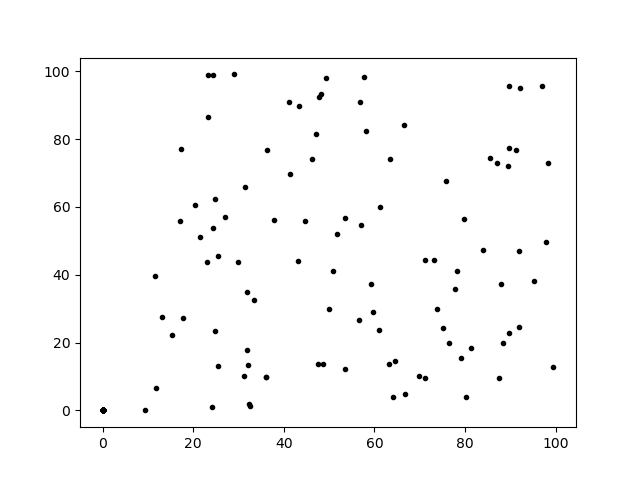

In [ ]:
fig,ax = plt.subplots()

# marker = ['.r','.b','.g','.k']
ax.plot(pos[0,:,:],pos[1,:,:],'.k')
plt.show()


In [ ]:
# print(pos[0,:,:])

pos_x = np.floor(pos[0,:,:])
pos_y = np.floor(pos[1,:,:])
# print(pos_x)
# print(pos_y)

# print(pos_x)

pixels = 100
image = np.zeros((pixels,pixels,T))
# image = np.array([pos[0,i,0],pos[1,j,0]] for i,j in range(N,N))

# for step in range(T):
#     for i in range(len(pos_x)):
#         image[int(pos_x[i]),int(pos_y[i]),step] = 1


# prova = np.zeros((10,10))

# for i,j in range(5):
#     prova[i][j] = 1
# print(pos_x[0])


In [ ]:
arr = [pos[0,:,:],pos[1,:,:]]

N = 800

# prova = np.zeros((N,N))
# prova[30:500][30:500] = 1

image = (image * 255).astype(np.uint8)  # Converti in uint8
# print(prova)
im = Image.fromarray(image)

fig, ax = plt.subplots()
plt.imshow(im)
plt.show()


# new_p = Image.fromarray(prova)
# if new_p.mode != 'RGB':
#     new_p = new_p.convert('RGB')


# im.save("zeri.png")


TypeError: Cannot handle this data type: (1, 1, 10), |u1

# Note:

- capire la Simulationarchive, che viene usata per mandare i dati della sim alla pagina 
- capire la heartbeat function
- fare il plummer https://rebound.readthedocs.io/en/latest/c_examples/selfgravity_plummer/
- fare test tempo rilassamento, ...
- dynamical friction
    - lasciare che il sistema si rilassi, poi introdurre il proiettile (con coord giuste) e indagare una singola decelerazione
    - t_rilax, verificare la formula di CHandrasekhar generale, 
